In [5]:
cd drive/MyDrive/

/content/drive/MyDrive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!nvidia-smi

Tue Jun 29 07:01:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 38kB/s 


In [7]:
ls

 cat-breeds-dataset.zip   cat.zip            'helmet detection'/
 cat_classification/     'Colab Notebooks'/   model_inception.h5


In [6]:
!nvidia-smi

Mon Jun 28 22:17:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt


In [10]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cat_classification/train'
valid_path = '/content/drive/MyDrive/cat_classification/test'

In [11]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [12]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [13]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cat_classification/train/*')

In [14]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 12520 images belonging to 10 classes.


In [26]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 3134 images belonging to 10 classes.


In [27]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
196/196 [==============================] - 4623s 24s/step - loss: 3.7738 - accuracy: 0.5420 - val_loss: 2.9604 - val_accuracy: 0.5913
Epoch 2/10
196/196 [==============================] - 161s 819ms/step - loss: 3.2438 - accuracy: 0.5844 - val_loss: 3.1438 - val_accuracy: 0.6228
Epoch 3/10
196/196 [==============================] - 162s 826ms/step - loss: 3.1743 - accuracy: 0.6167 - val_loss: 3.7776 - val_accuracy: 0.6206
Epoch 4/10
196/196 [==============================] - 159s 811ms/step - loss: 3.4692 - accuracy: 0.6423 - val_loss: 4.3249 - val_accuracy: 0.6184
Epoch 5/10
196/196 [==============================] - 158s 807ms/step - loss: 2.8789 - accuracy: 0.6697 - val_loss: 4.1035 - val_accuracy: 0.6219
Epoch 6/10
196/196 [==============================] - 157s 803ms/step - loss: 2.6751 - accuracy: 0.6862 - val_loss: 5.0640 - val_accuracy: 0.5692
Epoch 7/10
196/196 [==============================] - 158s 804ms/step - loss: 2.8342 - accuracy: 0.6943 - val_loss: 4.7678 - 

In [28]:
import matplotlib.pyplot as plt

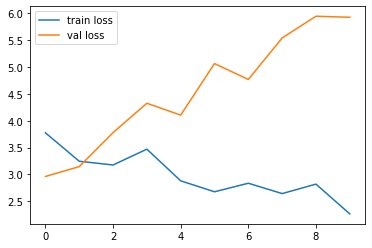

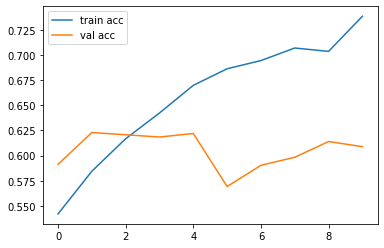

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [31]:
ls

 AccVal_acc.png           cat.zip              LossVal_loss.png
 cat-breeds-dataset.zip  'Colab Notebooks'/    model_inception.h5
 cat_classification/     'helmet detection'/


In [32]:
y_pred = model.predict(test_set)

In [34]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([5, 7, 7, ..., 5, 3, 8])